# Visualizing a Decision Tree Clasifier

### Loading neccessary packages

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

### Importing the dataset

In [58]:
df = pd.read_csv('./Iris.csv')
df.index = df['Id']
del df['Id']
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [68]:
df.shape

(150, 5)

### Converting the target column into a numerical column, that is understood better by the Decision Tree Clasifier

In [59]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [69]:
df['Species'] = df['Species'].replace({
  'Iris-setosa': 0,
  'Iris-versicolor': 1,
  'Iris-virginica': 2
})
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
6,5.4,3.9,1.7,0.4,0
7,4.6,3.4,1.4,0.3,0
8,5.0,3.4,1.5,0.2,0
9,4.4,2.9,1.4,0.2,0


In [61]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Separating independent columns from the dependent one

In [70]:
x, y = df.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], df.loc[:, 'Species']
x.head(10), y.head(10)

(    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 Id                                                          
 1             5.1           3.5            1.4           0.2
 2             4.9           3.0            1.4           0.2
 3             4.7           3.2            1.3           0.2
 4             4.6           3.1            1.5           0.2
 5             5.0           3.6            1.4           0.2
 6             5.4           3.9            1.7           0.4
 7             4.6           3.4            1.4           0.3
 8             5.0           3.4            1.5           0.2
 9             4.4           2.9            1.4           0.2
 10            4.9           3.1            1.5           0.1,
 Id
 1     0
 2     0
 3     0
 4     0
 5     0
 6     0
 7     0
 8     0
 9     0
 10    0
 Name: Species, dtype: int64)

### Spliting the dataset with a 70:30 ratio into test and train

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=18)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Creating and Fitting the data to the model

In [64]:
clf = tree.DecisionTreeClassifier(max_depth=20, max_features=1.0, random_state=18)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20, max_features=1.0, random_state=18)

### Checking the Accuracy of the model. The given accuracy is the F1 score of the model

In [65]:
print("F1 score:", clf.score(x_test, y_test))

F1 score: 0.9777777777777777


### Visualizing the Decision Tree Classifier

In [66]:
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

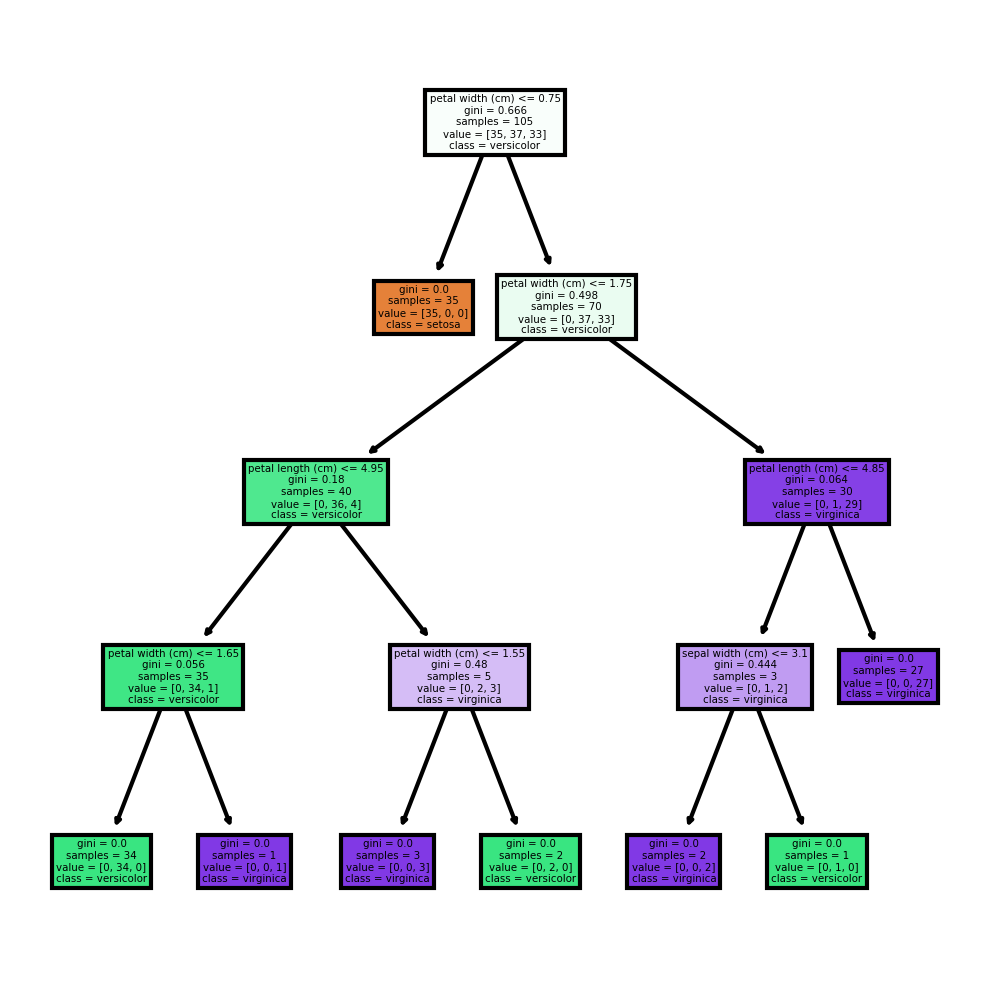

In [67]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('./tree.png')